<a href="https://colab.research.google.com/github/24jmwangi/KwanzaTukule/blob/main/KWANZA_TUKULE_CASE_STUDY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a Data Analysis case study for Kwanza Tukule using

1. Google colab-data cleaning analysis and transformation using python
2. Github- Deployment of the pipeline and CI/CD
3.Google Cloud Bigquery- storage of data and processing(considerations for later stage)
4. Looker studio and Python Dash- Dashboarding

The Analysis is broken down into
Sections
[Section 1- Data ingestion, cleaning and Loading](#Section1)

[Section 2-Exploratory Data Analysis](#Section2)

[Section 3- Advanced Analysis](#Section3)

[Section 4- Strategic Insights and Recommendations](#Section4)

[Section 5-Dashboard and Reporting](#Section5)

[Section 6- Bonus Section:](#Section6)

#Section 1- Data ingestion, cleaning and Loading

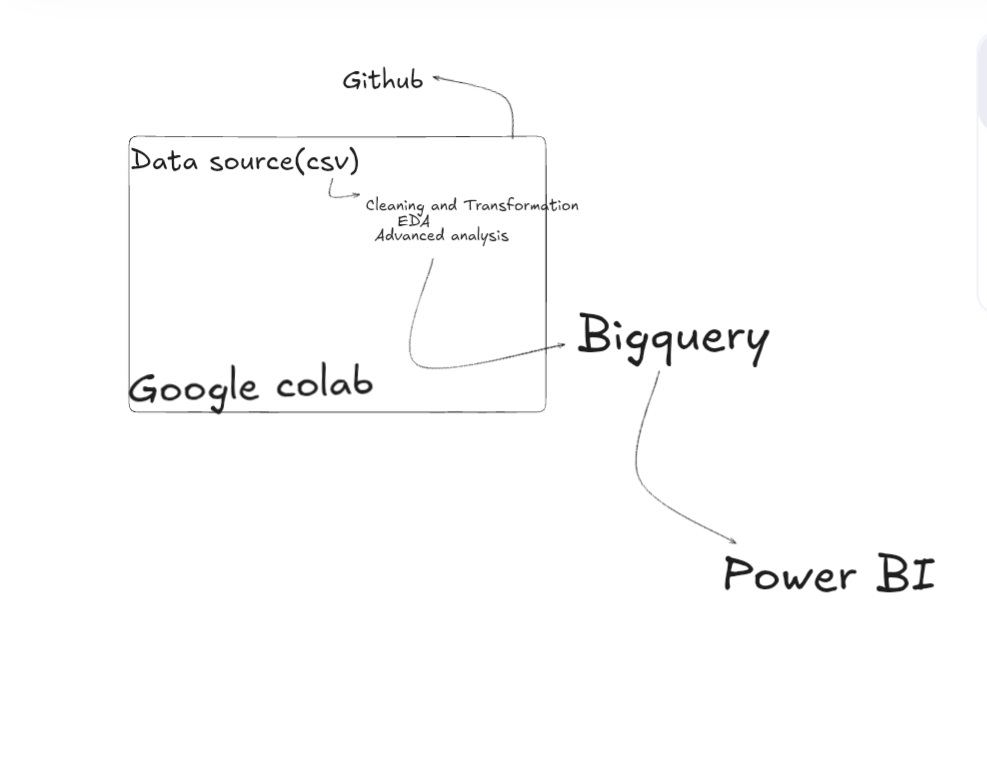

In [ ]:
#Architecture  of the Pipeline
from IPython.display import Image, display

# Define the image path
#image_path = '/content/Screenshot_20250123_203712_Chrome.jpg'

# Display the image
display(Image(filename='Screenshot_20250123_203712_Chrome.jpg'))
# Display the image
#display(Image(filename=image_path))

In [ ]:

# data ingestion
import pandas as pd
import gspread
from google.oauth2 import service_account
import os
from oauth2client.service_account import ServiceAccountCredentials

"""

#Using colab
# Authenticate with Google API
scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]

creds = ServiceAccountCredentials.from_json_keyfile_name('/content/kwanzatukule-448718-4ae789931127.json', scope)

client = gspread.authorize(creds)
# Open the Google Sheet
sheet_url = "https://docs.google.com/spreadsheets/d/1E90iFRs0fbn3cldZCQo7cGZ8XmBDYpdHuqeUEC3TGXc/edit#gid=1416790554"
sheet = client.open_by_url(sheet_url)

# Select the worksheet
worksheet = sheet.get_worksheet(0)  # Replace '0' with the sheet index or name if needed

# Fetch all data as a DataFrame
data = worksheet.get_all_records()
df = pd.DataFrame(data)

# Display the DataFrame
print(df.head(10))

"""

#Using github actions

import pandas as pd
import gspread
from google.oauth2 import service_account
import json
import os
from oauth2client.service_account import ServiceAccountCredentials
import secrets

from google.cloud import bigquery
from google.oauth2 import service_account

scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]

creds_path = "credentials.json"
# Authenticate using the credentials file set in the environment
credentials = service_account.Credentials.from_service_account_file(creds_path, scopes = scope) # Path to the credentials file in the runner

client = gspread.authorize(credentials)
# Open the Google Sheet
sheet_url = "https://docs.google.com/spreadsheets/d/1E90iFRs0fbn3cldZCQo7cGZ8XmBDYpdHuqeUEC3TGXc/edit#gid=1416790554"
sheet = client.open_by_url(sheet_url)

# Select the worksheet
worksheet = sheet.get_worksheet(0)  # Replace '0' with the sheet index or name if needed

# Fetch all data as a DataFrame
data = worksheet.get_all_records()
df = pd.DataFrame(data)

# Display the DataFrame
print(df.head(10))

# Initialize the BigQuery client
#client = bigquery.Client(credentials=credentials, project=credentials.project_id)

# Now you can interact with Google Cloud services

                       DATE ANONYMIZED CATEGORY ANONYMIZED PRODUCT  \
0  August 18, 2024, 9:32 PM        Category-106       Product-21f4   
1  August 18, 2024, 9:32 PM        Category-120       Product-4156   
2  August 18, 2024, 9:32 PM        Category-121       Product-49bd   
3  August 18, 2024, 9:32 PM         Category-76       Product-61dd   
4  August 18, 2024, 9:32 PM        Category-119       Product-66e0   
5  August 18, 2024, 9:32 PM         Category-76       Product-6e9c   
6  August 18, 2024, 9:32 PM        Category-120       Product-7864   
7  August 18, 2024, 9:32 PM        Category-119       Product-7940   
8  August 18, 2024, 9:32 PM         Category-96       Product-87b2   
9  August 18, 2024, 9:32 PM        Category-106       Product-c14c   

  ANONYMIZED BUSINESS ANONYMIZED LOCATION  QUANTITY UNIT PRICE  
0       Business-de42       Location-1ba8         1        850  
1       Business-de42       Location-1ba8         2       1910  
2       Business-de42       Locati

In [ ]:
# Data Cleaning and Transformation

# Inspect for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Inspect for duplicates
print("\nDuplicate Rows:")
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

# Inspect for inconsistent data types
print("\nData Types:")
print(df.dtypes)

# Resolve issues (example)
# 1. Handle Missing Values (example: fill with mean for numeric columns)
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    if df[col].isnull().any():
      df[col].fillna(df[col].mean(), inplace = True)

# 2. Remove Duplicate Rows (example)
df.drop_duplicates(inplace=True)

# 3. Convert data types (example)
# If a column should be numeric but has mixed types, convert it
# Check for columns with inconsistent types and apply appropriate conversions.
# Example (replace 'column_name' with the actual column name):
#if 'column_name' in df.columns:
  # try:
      #df['column_name'] = pd.to_numeric(df['column_name'], errors='coerce') # errors='coerce' sets invalid parsing to NaN
  # except:
       # print("Error converting 'column_name'")

# Display the updated DataFrame
print("\nDataFrame after cleaning:")
print(df.head(10))


Missing Values:
DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             0
dtype: int64

Duplicate Rows:


                             DATE ANONYMIZED CATEGORY ANONYMIZED PRODUCT  \
6153    January 6, 2024, 11:52 AM         Category-91       Product-1b48   
7554        July 9, 2024, 2:26 PM        Category-104       Product-af50   
7555        July 9, 2024, 2:26 PM         Category-92       Product-d09a   
12238     April 19, 2024, 3:19 PM         Category-75       Product-086d   
12239     April 19, 2024, 3:19 PM        Category-106       Product-21f4   
...                           ...                 ...                ...   
333133  February 1, 2024, 9:17 AM        Category-111       Product-7fac   
333134  February 1, 2024, 9:17 AM         Category-77       Product-d09c   
333350    June 10, 2024, 10:08 PM         Category-76       Product-e805   
333399   January 9, 2024, 8:49 PM         Category-97       Product-bbdc   
333400   January 9, 2024, 8:49 PM        Category-119       Product-e98d   

       ANONYMIZED BUSINESS ANONYMIZED LOCATION  QUANTITY UNIT PRICE  
6153         Busi


DataFrame after cleaning:
                       DATE ANONYMIZED CATEGORY ANONYMIZED PRODUCT  \
0  August 18, 2024, 9:32 PM        Category-106       Product-21f4   
1  August 18, 2024, 9:32 PM        Category-120       Product-4156   
2  August 18, 2024, 9:32 PM        Category-121       Product-49bd   
3  August 18, 2024, 9:32 PM         Category-76       Product-61dd   
4  August 18, 2024, 9:32 PM        Category-119       Product-66e0   
5  August 18, 2024, 9:32 PM         Category-76       Product-6e9c   
6  August 18, 2024, 9:32 PM        Category-120       Product-7864   
7  August 18, 2024, 9:32 PM        Category-119       Product-7940   
8  August 18, 2024, 9:32 PM         Category-96       Product-87b2   
9  August 18, 2024, 9:32 PM        Category-106       Product-c14c   

  ANONYMIZED BUSINESS ANONYMIZED LOCATION  QUANTITY UNIT PRICE  
0       Business-de42       Location-1ba8         1        850  
1       Business-de42       Location-1ba8         2       1910  
2      

In [ ]:
# Feature Engineering: Create the following columns: “Month-Year” (e.g., August 2024) from the “DATE” column.

import pandas as pd

# Convert 'Date' column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')

# Check the DataFrame to ensure conversion
print(df.head())
# Extract 'Month-Year' from the 'date' column
df['Month-Year'] = df['DATE'].dt.strftime('%B %Y')

# Display the updated DataFrame
print(df[['DATE', 'Month-Year']].head())

/tmp/ipykernel_2060/2382785479.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')


                 DATE ANONYMIZED CATEGORY ANONYMIZED PRODUCT  \
0 2024-08-18 21:32:00        Category-106       Product-21f4   
1 2024-08-18 21:32:00        Category-120       Product-4156   
2 2024-08-18 21:32:00        Category-121       Product-49bd   
3 2024-08-18 21:32:00         Category-76       Product-61dd   
4 2024-08-18 21:32:00        Category-119       Product-66e0   

  ANONYMIZED BUSINESS ANONYMIZED LOCATION  QUANTITY UNIT PRICE  
0       Business-de42       Location-1ba8         1        850  
1       Business-de42       Location-1ba8         2       1910  
2       Business-de42       Location-1ba8         1       3670  
3       Business-de42       Location-1ba8         1       2605  
4       Business-de42       Location-1ba8         5       1480  


                 DATE   Month-Year
0 2024-08-18 21:32:00  August 2024
1 2024-08-18 21:32:00  August 2024
2 2024-08-18 21:32:00  August 2024
3 2024-08-18 21:32:00  August 2024
4 2024-08-18 21:32:00  August 2024


#Section 2-Exploratory Data Analysis

In [ ]:
# Add a 'total value' column

# Convert all column names to lowercase
df.columns = df.columns.str.lower()

# Check the updated column names

df['total_value'] = df['quantity'] * df['unit price']

# Display the updated DataFrame
df.head()

print(df.dtypes)
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')
df['unit price'] = pd.to_numeric(df['unit price'], errors='coerce')

# Recalculate 'total_value' after conversion
df['total_value'] = df['quantity'] * df['unit price']

date                   datetime64[ns]
anonymized category            object
anonymized product             object
anonymized business            object
anonymized location            object
quantity                        int64
unit price                     object
month-year                     object
total_value                    object
dtype: object


In [ ]:
# Group by Anonymized Category
category_summary = df.groupby('anonymized category').agg({
    'quantity': 'sum',
    'total_value': 'sum'
}).reset_index()

# Display the summary
print(category_summary)

   anonymized category  quantity  total_value
0         Category-100     76824  134902751.0
1         Category-101     19585   35577822.0
2         Category-102      1786     464463.0
3         Category-104      1217    1557598.0
4         Category-105      1579    2690719.0
5         Category-106      6521    5932763.0
6         Category-107      2730    4170797.0
7         Category-108      9756    5101375.0
8         Category-109      1446    1263226.0
9         Category-110     10529    5483386.0
10        Category-111      6715    4387343.0
11        Category-113       741    1254083.0
12        Category-114         4       8600.0
13        Category-115       348     425360.0
14        Category-116       856     422745.0
15        Category-117         5       1550.0
16        Category-118        21       7560.0
17        Category-119     68332  103454819.0
18        Category-120    169715  319178743.0
19        Category-121     14669   22327643.0
20        Category-122      1226  

In [ ]:
# Group by Anonymized Business
business_summary = df.groupby('anonymized business').agg({
    'quantity': 'sum',
    'total_value': 'sum'
}).reset_index()

# Display the summary
# Display only the first 50 rows
print(business_summary.head(50))

   anonymized business  quantity  total_value
0        Business-0000         8      10445.0
1        Business-0005         1       2645.0
2        Business-0029        26      77340.0
3        Business-003d        98     221761.0
4        Business-0072       127     225056.0
5        Business-0078       317    1056525.0
6        Business-007a         2       4010.0
7        Business-0086         6      11200.0
8        Business-00a2         9      20685.0
9        Business-00a7         5       9425.0
10       Business-00ac        10      22210.0
11       Business-00b7         2       2900.0
12       Business-00e7        29      85643.0
13       Business-00f8        16      47767.0
14       Business-00fa       180     334250.0
15       Business-0105        41      88285.0
16       Business-0109       279    1006802.0
17       Business-010c        22      49300.0
18       Business-0113         1       1890.0
19       Business-013f       136     292275.0
20       Business-0143         6  

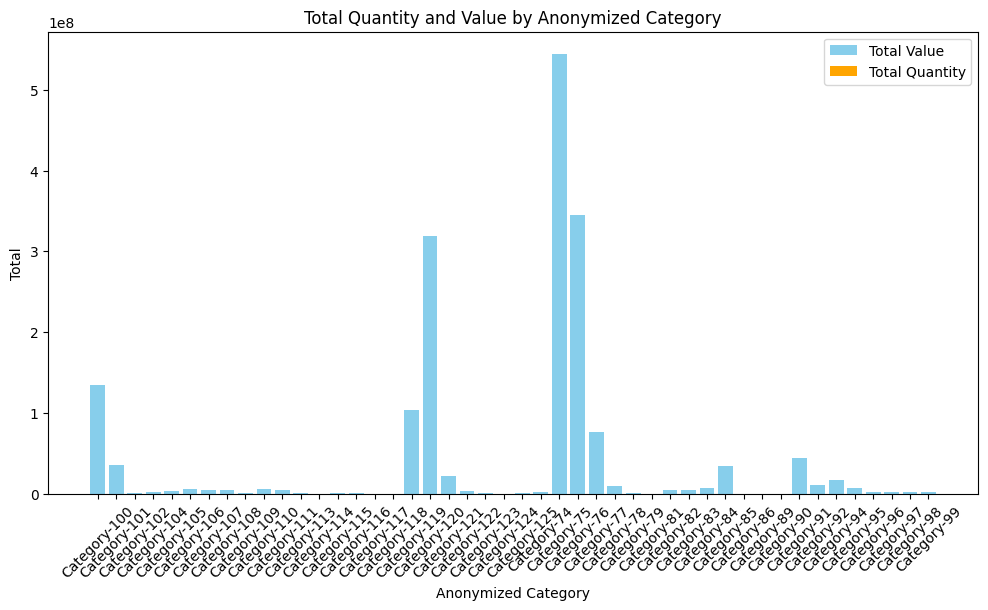

In [ ]:
import matplotlib.pyplot as plt

# Plot total quantity and value for categories
plt.figure(figsize=(12, 6))
plt.bar(category_summary['anonymized category'], category_summary['total_value'], color='skyblue', label='Total Value')
plt.bar(category_summary['anonymized category'], category_summary['quantity'], color='orange', label='Total Quantity')
plt.title('Total Quantity and Value by Anonymized Category')
plt.xlabel('Anonymized Category')
plt.ylabel('Total')
plt.legend()
plt.xticks(rotation=45)
plt.show()

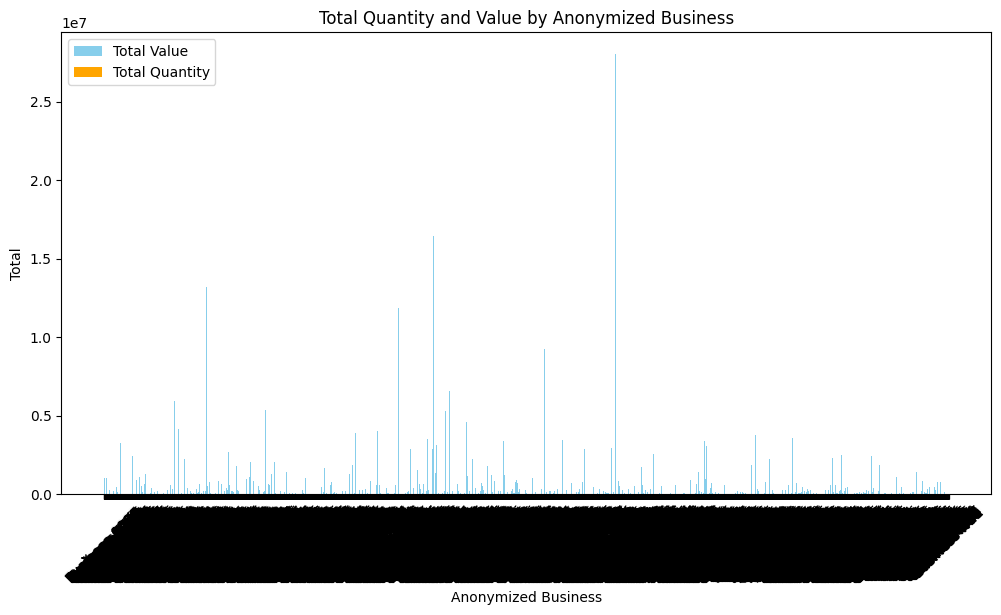

In [ ]:
# Plot total quantity and value for businesses
plt.figure(figsize=(12, 6))
plt.bar(business_summary['anonymized business'], business_summary['total_value'], color='skyblue', label='Total Value')
plt.bar(business_summary['anonymized business'], business_summary['quantity'], color='orange', label='Total Quantity')
plt.title('Total Quantity and Value by Anonymized Business')
plt.xlabel('Anonymized Business')
plt.ylabel('Total')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
from tabulate import tabulate

# Display category summary
print("Category Summary:")
print(tabulate(category_summary, headers='keys', tablefmt='pretty'))

Category Summary:
+----+---------------------+----------+-------------+
|    | anonymized category | quantity | total_value |
+----+---------------------+----------+-------------+
| 0  |    Category-100     |  76824   | 134902751.0 |
| 1  |    Category-101     |  19585   | 35577822.0  |
| 2  |    Category-102     |   1786   |  464463.0   |
| 3  |    Category-104     |   1217   |  1557598.0  |
| 4  |    Category-105     |   1579   |  2690719.0  |
| 5  |    Category-106     |   6521   |  5932763.0  |
| 6  |    Category-107     |   2730   |  4170797.0  |
| 7  |    Category-108     |   9756   |  5101375.0  |
| 8  |    Category-109     |   1446   |  1263226.0  |
| 9  |    Category-110     |  10529   |  5483386.0  |
| 10 |    Category-111     |   6715   |  4387343.0  |
| 11 |    Category-113     |   741    |  1254083.0  |
| 12 |    Category-114     |    4     |   8600.0    |
| 13 |    Category-115     |   348    |  425360.0   |
| 14 |    Category-116     |   856    |  422745.0   |
| 15 |    

In [ ]:
# Display business summary
print("\nBusiness Summary:")
print(tabulate(business_summary, headers='keys', tablefmt='pretty'))


Business Summary:
+------+---------------------+----------+-------------+
|      | anonymized business | quantity | total_value |
+------+---------------------+----------+-------------+
|  0   |    Business-0000    |    8     |   10445.0   |
|  1   |    Business-0005    |    1     |   2645.0    |
|  2   |    Business-0029    |    26    |   77340.0   |
|  3   |    Business-003d    |    98    |  221761.0   |
|  4   |    Business-0072    |   127    |  225056.0   |
|  5   |    Business-0078    |   317    |  1056525.0  |
|  6   |    Business-007a    |    2     |   4010.0    |
|  7   |    Business-0086    |    6     |   11200.0   |
|  8   |    Business-00a2    |    9     |   20685.0   |
|  9   |    Business-00a7    |    5     |   9425.0    |
|  10  |    Business-00ac    |    10    |   22210.0   |
|  11  |    Business-00b7    |    2     |   2900.0    |
|  12  |    Business-00e7    |    29    |   85643.0   |
|  13  |    Business-00f8    |    16    |   47767.0   |
|  14  |    Business-00fa    

   month-year  quantity  total_value
0  2024-01-01     67526  185626186.0
1  2024-02-01     44063  126579702.0
2  2024-03-01     45382  116000676.0
3  2024-04-01     50554  122110750.0
4  2024-05-01     69551  168781502.0
5  2024-06-01     60717  135138614.0
6  2024-07-01     74691  171040881.0
7  2024-08-01     68859  146581003.0
8  2024-09-01     66747  137791455.0
9  2024-10-01     84739  183840551.0
10 2024-11-01     75361  165933104.0
11 2024-12-01     57631  109549774.0


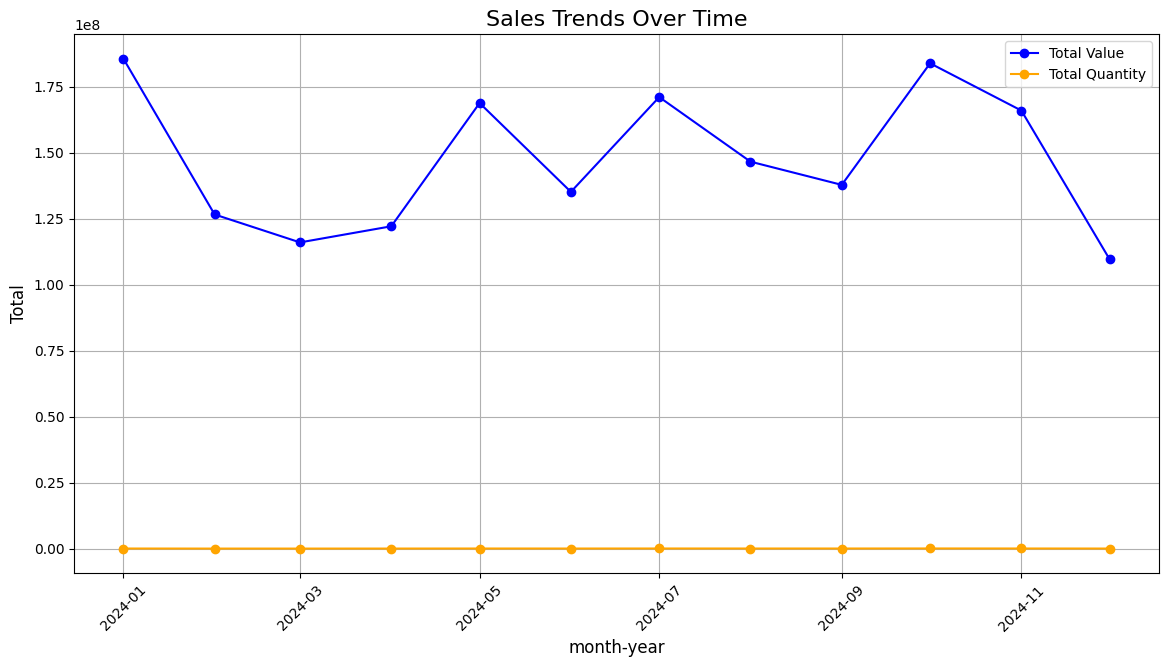

In [ ]:


#Trends Over Time

#Step 1: Ensure Proper Date Format

#Ensure that the Month-Year column is in datetime format. If it's not, convert it.

# Convert 'Month-Year' to datetime format if not already
df['month-year'] = pd.to_datetime(df['month-year'], format='%B %Y', errors='coerce')

# Sort the DataFrame by 'Month-Year'
df = df.sort_values('month-year')




#Step 2: Group by Month-Year

#Aggregate the total Value and Quantity for each Month-Year.

# Group by 'month-year' and calculate total Quantity and Value
time_summary = df.groupby('month-year').agg({
    'quantity': 'sum',
    'total_value': 'sum'
}).reset_index()

# Display the summarized data
print(time_summary)




#Step 3: Create a Time Series Plot

#Use Matplotlib to visualize sales trends over time.

import matplotlib.pyplot as plt

# Plot the trends
plt.figure(figsize=(14, 7))

# Plot total value
plt.plot(time_summary['month-year'], time_summary['total_value'], label='Total Value', marker='o', color='blue')

# Plot total quantity
plt.plot(time_summary['month-year'], time_summary['quantity'], label='Total Quantity', marker='o', color='orange')

# Add titles and labels
plt.title('Sales Trends Over Time', fontsize=16)
plt.xlabel('month-year', fontsize=12)
plt.ylabel('Total', fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


#Step 4: Analyze Seasonal Patterns

#From the plot:

Analysis of the Sales Trends Over Time Plot:

1. Blue Line (Total Value):

The total sales value exhibits a clear fluctuation over the months.

High Points: Peaks in total value are observed in certain months (e.g., the beginning and mid-year).

Low Points: A noticeable drop occurs in some months (e.g., early in the second quarter and towards the end of the year).



2. Orange Line (Total Quantity):

The total quantity remains consistently low throughout the year, indicating that high sales value is likely driven by high unit prices rather than the number of units sold.



3. Key Observations:

There is no strong correlation between the quantity sold and the total value. This suggests that some products or categories might have a significantly higher price, contributing to the total value.

Seasonal trends might be influencing the sales value, with certain months performing better.

In [ ]:
"""
Performance Analysis
#1: Group by Product

#We need to group the data by the anonymized product column to calculate the total Quantity and Value for each product.

# Group by 'anonymized product' and calculate total Quantity and Value
"""
product_summary = df.groupby('anonymized product').agg({
    'quantity': 'sum',
    'total_value': 'sum'
}).reset_index()

# Display the summary
print(product_summary.head())

"""
#Step 2: Identify Top 5 Most Frequently Purchased Products

Sort the product_summary DataFrame by quantity in descending order and extract the top 5.
"""

# Top 5 most frequently purchased products
top_5_quantity = product_summary.sort_values('quantity', ascending=False).head(5)

# Display the results
print("Top 5 Most Frequently Purchased Products:")
print(top_5_quantity)


#Step 3: Identify Top 5 Most Valuable Products

#Sort the product_summary DataFrame by total_value in descending order and extract the top 5.

# Top 5 most valuable products
top_5_value = product_summary.sort_values('total_value', ascending=False).head(5)

# Display the results
print("Top 5 Most Valuable Products:")
print(top_5_value)

  anonymized product  quantity  total_value
0       Product-0001       286     730730.0
1       Product-0031        49      85554.0
2       Product-004f         8      39040.0
3       Product-02e4       225      58620.0
4       Product-031c      1237    2404010.0
Top 5 Most Frequently Purchased Products:
    anonymized product  quantity  total_value
339       Product-66e0     46957   70704225.0
753       Product-e805     42602  262787281.0
477       Product-8f75     37566  158797460.0
128       Product-29ee     35940   68248274.0
214       Product-4156     28487   56956007.0
Top 5 Most Valuable Products:
    anonymized product  quantity  total_value
753       Product-e805     42602  262787281.0
477       Product-8f75     37566  158797460.0
339       Product-66e0     46957   70704225.0
128       Product-29ee     35940   68248274.0
214       Product-4156     28487   56956007.0


#SECTION 3: ADVANCED ANALYSIS

In [ ]:
# prompt: Create a column summary table for stats

# Create the column summary table
def column_summary(df):
    summary = pd.DataFrame(index=df.columns)
    summary['Data Type'] = df.dtypes
    summary['Unique Values'] = df.nunique()
    summary['Missing Values'] = df.isnull().sum()
    summary['Mean'] = df.mean(numeric_only=True)
    summary['Std Dev'] = df.std(numeric_only=True)
    summary['Min'] = df.min(numeric_only=True)
    summary['Max'] = df.max(numeric_only=True)
    return summary

# Call the function to generate the summary table
column_stats = column_summary(df)

# Display the summary table
print(tabulate(column_stats, headers='keys', tablefmt='psql'))

+---------------------+----------------+-----------------+------------------+------------+------------+-------+---------------+
|                     | Data Type      |   Unique Values |   Missing Values |       Mean |    Std Dev |   Min |           Max |
|---------------------+----------------+-----------------+------------------+------------+------------+-------+---------------|
| date                | datetime64[ns] |           96703 |                0 |  nan       |   nan      |   nan |   nan         |
| anonymized category | object         |              46 |                0 |  nan       |   nan      |   nan |   nan         |
| anonymized product  | object         |             820 |                0 |  nan       |   nan      |   nan |   nan         |
| anonymized business | object         |            4800 |                0 |  nan       |   nan      |   nan |   nan         |
| anonymized location | object         |              53 |                0 |  nan       |   nan      | 

/opt/hostedtoolcache/Python/3.8.18/x64/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


     anonymized business  Segment
0          Business-0000        0
1          Business-0005        0
2          Business-0029        0
3          Business-003d        0
4          Business-0072        0
...                  ...      ...
4795       Business-ffa9        0
4796       Business-ffae        0
4797       Business-ffb1        0
4798       Business-ffd2        0
4799       Business-ffff        0

[4800 rows x 2 columns]


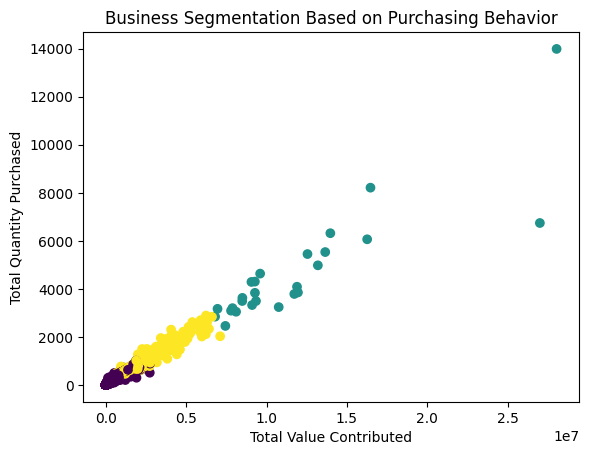

In [ ]:


#Customer segmentation

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#
# Grouping by 'anonymized business' and aggregating total quantity, total value, and transaction frequency
df_aggregated = df.groupby('anonymized business').agg(
    total_quantity=('quantity', 'sum'),
    total_value=('total_value', 'sum'),
    transaction_frequency=('anonymized business', 'count')
).reset_index()

# Normalize the data for clustering
features = ['total_quantity', 'total_value', 'transaction_frequency']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_aggregated[features])

# Apply K-Means clustering to segment businesses into 3 groups
kmeans = KMeans(n_clusters=3, random_state=42)
df_aggregated['Segment'] = kmeans.fit_predict(scaled_data)

# Display the segmented DataFrame
print(df_aggregated[['anonymized business', 'Segment']])

# Visualizing the clusters (Total Value vs. Total Quantity)
plt.scatter(df_aggregated['total_value'], df_aggregated['total_quantity'], c=df_aggregated['Segment'], cmap='viridis')
plt.xlabel('Total Value Contributed')
plt.ylabel('Total Quantity Purchased')
plt.title('Business Segmentation Based on Purchasing Behavior')
plt.show()

Interpreting the Segments:

After running the clustering algorithm, businesses will be assigned to one of the three segments. Below is how we can interpret the groups:

1. High Value Segment:

Characteristics: Businesses with high total value, high quantity, and frequent transactions.

Recommendations:

Loyalty Programs: Offer loyalty programs, exclusive deals, and personalized offers to retain them.

Volume Discounts: Provide volume discounts or special pricing to encourage even higher purchases.

Priority Support: Offer premium customer service or dedicated account managers.


2. Medium Value Segment:

Characteristics: Businesses with moderate total value, moderate quantity, and transaction frequency.

Recommendations:

Cross-Selling: Focus on cross-selling or upselling opportunities to increase total value.

Incentivize Repeat Purchases: Offer incentives for repeat purchases, such as discounts or rewards for frequent transactions.

Targeted Marketing: Create personalized marketing campaigns based on their purchasing behavior to increase engagement.




3. Low Value Segment:

Characteristics: Businesses with low total value, low quantity, and infrequent transactions.

Recommendations:

Introductory Offers: Provide introductory offers or promotions to encourage more purchases.

Address Barriers: Identify barriers to higher spending (e.g., product availability, pricing) and address them.

Educational Content: Offer educational content or product demonstrations to increase the perceived value of your offerings.

In [ ]:
# Save df to a new  dataframe2

df2 = df.copy()

In [ ]:
import pandas as pd


df2['month-year'] = pd.to_datetime(df2['month-year'], format='%Y-%m-%d')

# Set 'month-year' as the index
df2.set_index('month-year', inplace=True)

# Aggregate the data by month to get the total sales
monthly_sales = df2.groupby(pd.Grouper(freq='M'))['total_value'].sum()

# Display the aggregated monthly sales
print(monthly_sales)

month-year
2024-01-31    185626186.0
2024-02-29    126579702.0
2024-03-31    116000676.0
2024-04-30    122110750.0
2024-05-31    168781502.0
2024-06-30    135138614.0
2024-07-31    171040881.0
2024-08-31    146581003.0
2024-09-30    137791455.0
2024-10-31    183840551.0
2024-11-30    165933104.0
2024-12-31    109549774.0
Freq: M, Name: total_value, dtype: float64


In [ ]:


### FORECAST
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#df2 is already defined and contains the data

# Convert 'month-year' to datetime and set as index
#df2['month-year'] = pd.to_datetime(df2['month-year'], format='%Y-%m-%d')
#df2.set_index('month-year', inplace=True)

# Aggregate the data by month to get the total sales
monthly_sales = df2.groupby(pd.Grouper(freq='M'))['total_value'].sum()

# Fit Exponential Smoothing model (additive trend and seasonality, seasonal period of 12 months)
hw_model = ExponentialSmoothing(monthly_sales, trend='add', seasonal='add', seasonal_periods=4)
hw_fit = hw_model.fit()

# Forecast next 3 months
forecast = hw_fit.forecast(steps=3)

# Create forecast index
forecast_index = pd.date_range(start=monthly_sales.index[-1], periods=4, freq='M')[1:]

# Create DataFrame for forecasted values
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecasted Sales'])

# Display forecast
print(forecast_df)

            Forecasted Sales
2025-01-31      1.503326e+08
2025-02-28      1.894314e+08
2025-03-31      1.744161e+08


/opt/hostedtoolcache/Python/3.8.18/x64/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


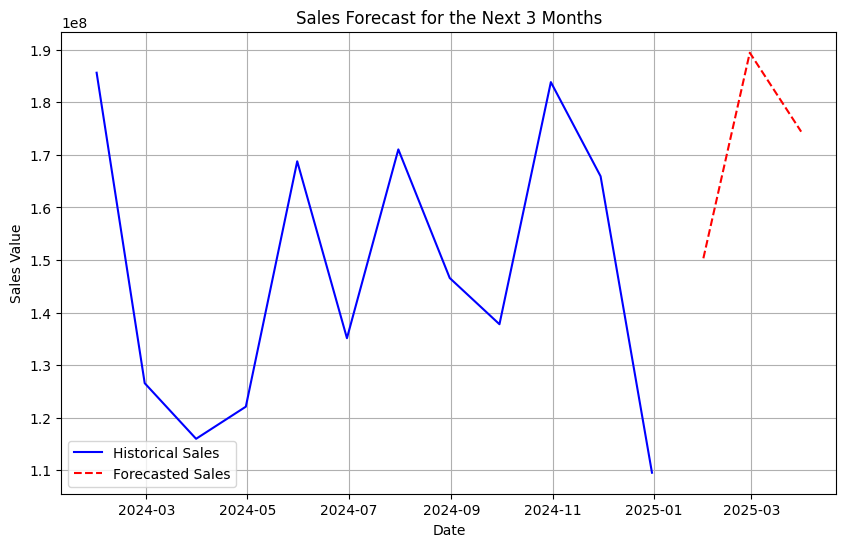

In [ ]:
# Plot the historical data and forecasted data

plt.figure(figsize=(10, 6))

# Plot historical data
plt.plot(monthly_sales.index, monthly_sales, label='Historical Sales', color='blue')

# Plot forecasted data
plt.plot(forecast_df.index, forecast_df['Forecasted Sales'], label='Forecasted Sales', color='red', linestyle='--')

# Add labels and title
plt.title('Sales Forecast for the Next 3 Months')
plt.xlabel('Date')
plt.ylabel('Sales Value')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

Anomalies in Quantity:
            quantity  quantity_zscore
month-year                           
2024-01-01        20         4.691999
2024-01-01        15         3.364963
2024-01-01        50        12.654214
2024-01-01        40        10.000142
2024-01-01        40        10.000142
...              ...              ...
2024-12-01        20         4.691999
2024-12-01        30         7.346071
2024-12-01        32         7.876885
2024-12-01        20         4.691999
2024-12-01        20         4.691999

[4937 rows x 2 columns]

Anomalies in Total Value:
            total_value  value_zscore
month-year                           
2024-01-01      42600.0      3.402544
2024-01-01      90500.0      7.779375
2024-01-01     128000.0     11.205914
2024-01-01      72550.0      6.139206
2024-01-01      86400.0      7.404741
...                 ...           ...
2024-12-01      65600.0      5.504154
2024-12-01      48500.0      3.941653
2024-12-01      55050.0      4.540155
2024-12-01   

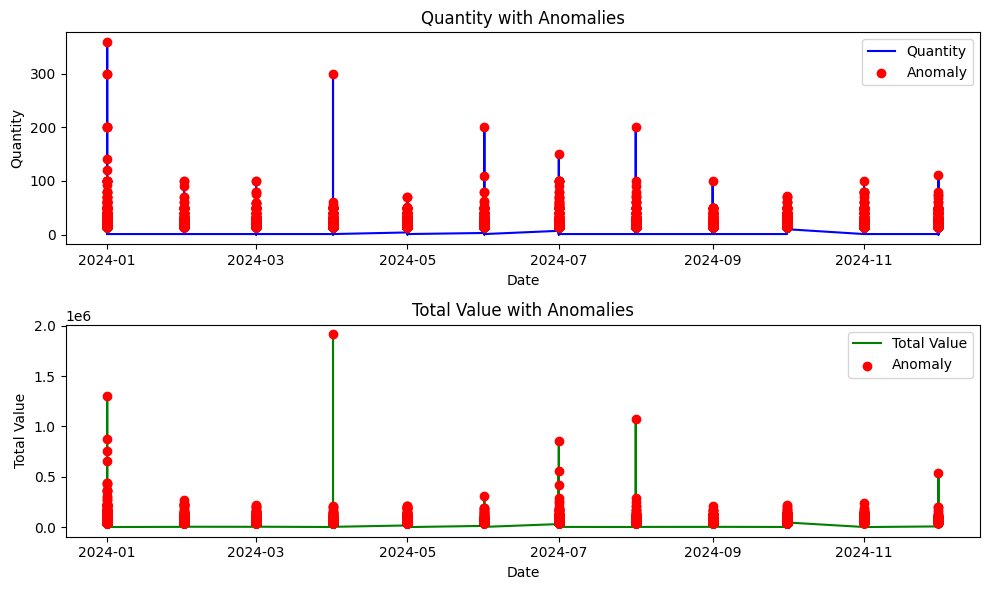

In [ ]:


###ANOMALIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# df2 is already defined and contains the data
# Convert 'month-year' to datetime and set as index
#df2['month-year'] = pd.to_datetime(df2['month-year'], format='%Y-%m-%d')
#df2.set_index('month-year', inplace=True)

# Calculate Z-scores for quantity and total_value columns
df2['quantity_zscore'] = (df2['quantity'] - df2['quantity'].mean()) / df2['quantity'].std()
df2['value_zscore'] = (df2['total_value'] - df2['total_value'].mean()) / df2['total_value'].std()

# Define threshold for anomaly detection (e.g., Z-score > 3 or < -3)
quantity_anomalies = df2[df2['quantity_zscore'].abs() > 3]
value_anomalies = df2[df2['value_zscore'].abs() > 3]

# Print detected anomalies
print("Anomalies in Quantity:")
print(quantity_anomalies[['quantity', 'quantity_zscore']])

print("\nAnomalies in Total Value:")
print(value_anomalies[['total_value', 'value_zscore']])

# Plot the data with anomalies
plt.figure(figsize=(10, 6))

# Plot Quantity with anomalies
plt.subplot(2, 1, 1)
plt.plot(df2.index, df2['quantity'], label='Quantity', color='blue')
plt.scatter(quantity_anomalies.index, quantity_anomalies['quantity'], color='red', label='Anomaly', zorder=5)
plt.title('Quantity with Anomalies')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()

# Plot Total Value with anomalies
plt.subplot(2, 1, 2)
plt.plot(df2.index, df2['total_value'], label='Total Value', color='green')
plt.scatter(value_anomalies.index, value_anomalies['total_value'], color='red', label='Anomaly', zorder=5)
plt.title('Total Value with Anomalies')
plt.xlabel('Date')
plt.ylabel('Total Value')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

EXPLANATION

1. temporary promotions or discounts could cause a sudden surge in both quantity and total value. This is especially likely if the anomalies are concentrated around specific dates.
2. Supply Chain Disruptions:
 Unexpected events like supply chain disruptions (e.g., delays, shortages) can lead to a sudden increase in order quantities to replenish stock. This could result in higher total values as well.
3. Seasonal Fluctuations:
If the product or service is seasonal, anomalies might correspond to peak seasons or holidays when demand is significantly higher.

Correlation between Quantity and Total Value: 0.8353330449727047


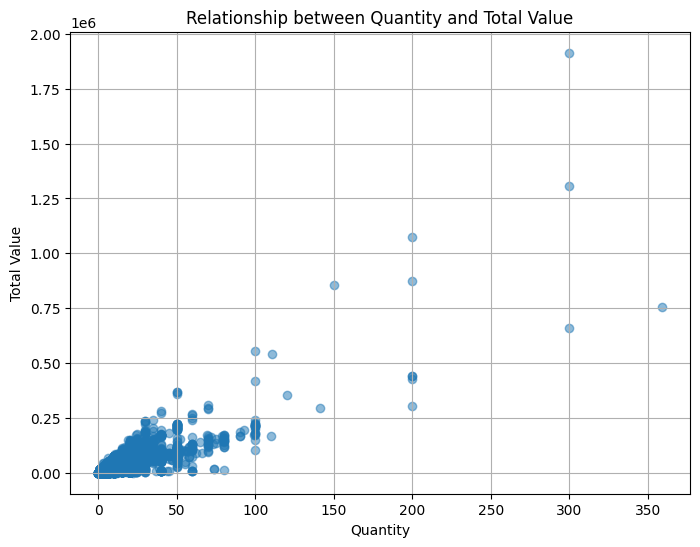


Correlation by Anonymized Category:


quantity  total_value
anonymized category                                   
Category-100        quantity     1.000000     0.988906
                    total_value  0.988906     1.000000
Category-101        quantity     1.000000     0.975730
                    total_value  0.975730     1.000000
Category-102        quantity     1.000000     0.976986
...                                   ...          ...
Category-97         total_value  0.042413     1.000000
Category-98         quantity     1.000000     0.510667
                    total_value  0.510667     1.000000
Category-99         quantity     1.000000     0.935171
                    total_value  0.935171     1.000000

[92 rows x 2 columns]

In [ ]:
###Correlation Analysis:Examine relationships between Quantity and Value. Provide insights into which factors drive sales performance.

import pandas as pd
import matplotlib.pyplot as plt




# Calculate the correlation between Quantity and Total Value
correlation = df2['quantity'].corr(df2['total_value'])

print(f"Correlation between Quantity and Total Value: {correlation}")

# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(df['quantity'], df['total_value'], alpha=0.5)
plt.title('Relationship between Quantity and Total Value')
plt.xlabel('Quantity')
plt.ylabel('Total Value')
plt.grid(True)
plt.show()

#Further analysis (example)
# Group by 'anonymized category' and calculate correlation within each category
category_correlations = df2.groupby('anonymized category')[['quantity', 'total_value']].corr()

print("\nCorrelation by Anonymized Category:")
category_correlations

Specific Observations:

 1.There are some instances where a high Quantity does not correspond to a high Total Value, and vice versa. This indicates that the relationship is not deterministic and that other factors are at play.

Possible Explanations:
 1. Product Pricing: Different products likely have different prices. A high Quantity of low-priced items might not result in a high Total Value compared to a lower Quantity of high-priced items.
 2. Discounts and Promotions: Discounts or promotions could lead to a high Quantity but a lower Total Value

#SECTION 4 - STRATEGIC INSIGHTS

   anonymized category  total_sales_value  total_quantity_sold  \
25         Category-75        544658700.0               151330   
26         Category-76        344939553.0                71719   
18        Category-120        319178743.0               169715   
0         Category-100        134902751.0                76824   
17        Category-119        103454819.0                68332   
27         Category-77         76741382.0                28455   
38         Category-91         44152103.0                20853   
1         Category-101         35577822.0                19585   
34         Category-85         33762533.0                22997   
19        Category-121         22327643.0                14669   
40         Category-94         16750815.0                23670   
39         Category-92         10468723.0                 6954   
28         Category-78          9792609.0                 9766   
41         Category-95          7466932.0                 4117   
33        

/tmp/ipykernel_2060/449648284.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sales_value', y='anonymized category', data=category_sales_sorted, palette='viridis')


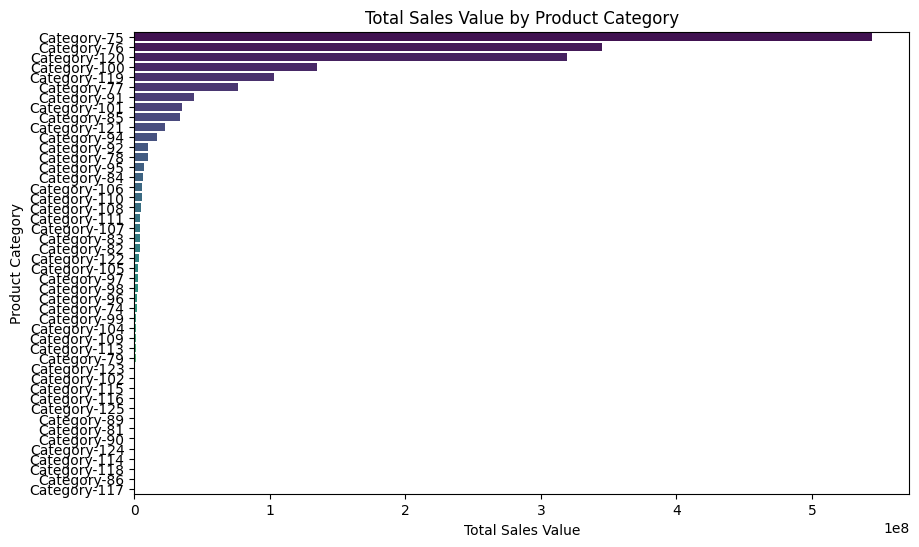

In [ ]:
import seaborn as sns
category_sales = df2.groupby('anonymized category').agg(
    total_sales_value=('total_value', 'sum'),
    total_quantity_sold=('quantity', 'sum'),
    average_unit_price=('unit price', 'mean')
).reset_index()

# Sort the categories by total sales value in descending order
category_sales_sorted = category_sales.sort_values(by='total_sales_value', ascending=False)

# Display the top categories
print(category_sales_sorted)

# Visualize the total sales value by category
plt.figure(figsize=(10, 6))
sns.barplot(x='total_sales_value', y='anonymized category', data=category_sales_sorted, palette='viridis')
plt.title('Total Sales Value by Product Category')
plt.xlabel('Total Sales Value')
plt.ylabel('Product Category')
plt.show()

Recommendation:

Given its exceptional performance, Category-75 should be prioritized for marketing campaigns. Allocating resources towards promoting products within this category can potentially lead to increased sales, revenue, and market share.

Justification:
The data clearly demonstrates the superior performance of Category-75 compared to other categories. Investing in marketing efforts for this category is likely to yield substantial returns due to its high demand and profit potential.

Additional Considerations:
Competitive Analysis: While Category-75 is currently the top performer, it's crucial to analyze the competition within this category to identify unique selling propositions and competitive advantages.

month-year           2024-01-31  2024-02-29  2024-03-31  2024-04-30  \
anonymized business                                                   
Business-0000               0.0         0.0         0.0         0.0   
Business-003d               0.0         0.0         0.0         0.0   
Business-00a2               0.0         0.0         0.0         0.0   
Business-00ac               0.0         0.0         0.0         0.0   
Business-0109               0.0         0.0         0.0         0.0   
Business-010c               0.0         0.0         1.0        -2.0   
Business-016c               0.0        -7.0         4.0       -12.0   
Business-01d3               0.0         0.0         0.0         0.0   
Business-01de               0.0       -46.0        -2.0         0.0   
Business-01e4               0.0         0.0         0.0         0.0   
Business-0204               0.0        -8.0       -10.0       -14.0   
Business-0215               0.0         0.0         0.0         0.0   
Busine

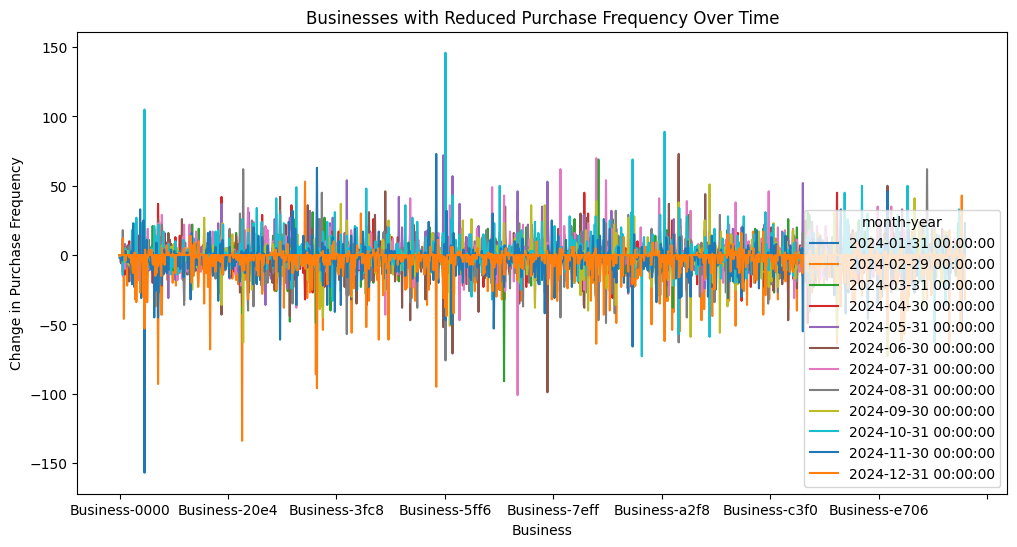

In [ ]:
df3 = df.copy()

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# df3 contains the data with 'anonymized business' and 'month-year' columns
# Convert 'month-year' to datetime if not already
# df3['month-year'] = pd.to_datetime(df3['month-year'], format='%Y-%m-%d')

# Group by business and month to calculate the purchase frequency
business_frequency = df3.groupby(['anonymized business', pd.Grouper(key='month-year', freq='M')]).size().reset_index(name='purchase_frequency')

# Pivot the data to have businesses as rows and months as columns
business_frequency_pivot = business_frequency.pivot(index='anonymized business', columns='month-year', values='purchase_frequency')

# Calculate the month-to-month change in purchase frequency for each business
business_frequency_pivot_diff = business_frequency_pivot.diff(axis=1).fillna(0)

# Identify businesses with a negative trend in frequency (i.e., reduced frequency)
reduced_frequency_businesses = business_frequency_pivot_diff[business_frequency_pivot_diff.mean(axis=1) < 0]

# Display businesses with reduced frequency
print(reduced_frequency_businesses.head(50))

# Visualize the trends for businesses with reduced frequency
reduced_frequency_businesses.plot(figsize=(12, 6))
plt.title('Businesses with Reduced Purchase Frequency Over Time')
plt.xlabel('Business')
plt.ylabel('Change in Purchase Frequency')
plt.show()

Strategies to Re-engage Customers
   1. Personalized Communication:
   2. Tailored Offers: Send targeted promotions and discounts based on past purchase history and preferences.
   3. Exclusive Content: Provide access to exclusive content, such as early access to new products, special offers, or behind-the-scenes information.
   4. Personalized Recommendations: Leverage data to recommend products or services that align with the customer's interests and past purchases.

   5. Loyalty Programs and Rewards:
   6. Tiered Rewards: Offer tiered rewards based on purchase frequency or loyalty level.

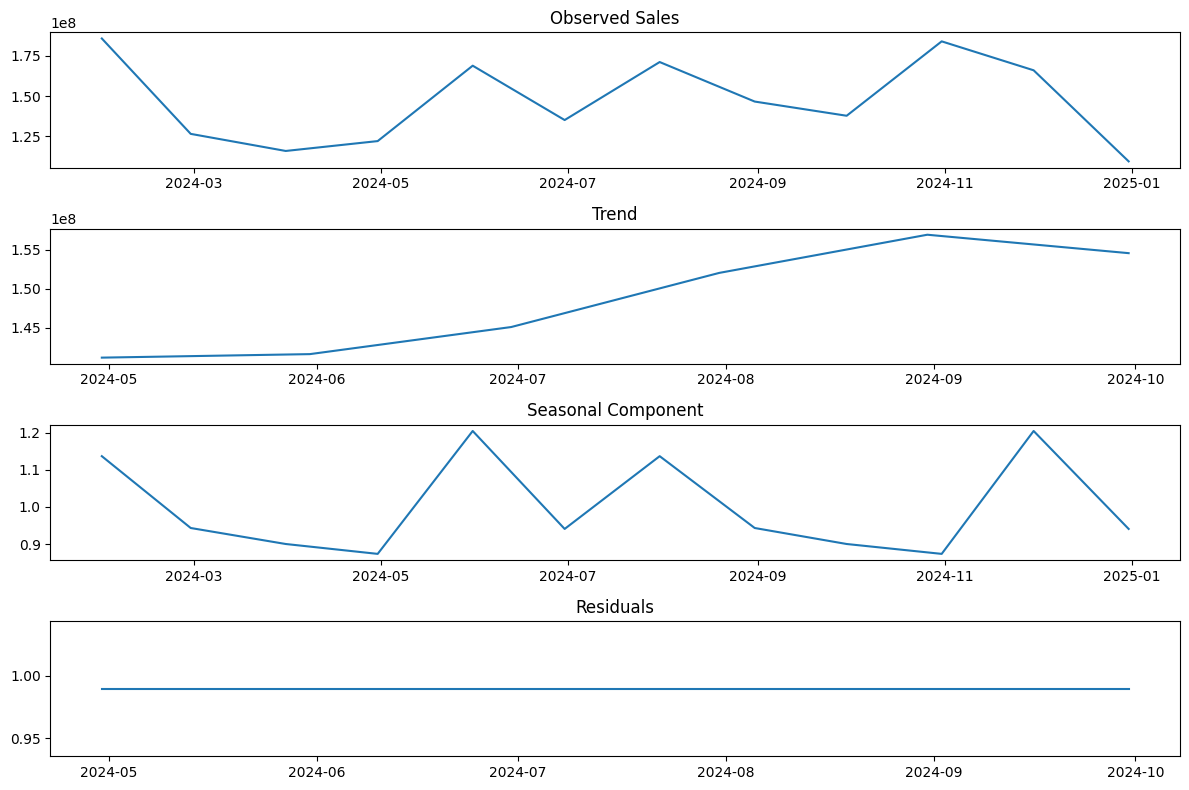

Months with peak seasonal demand: 2024-05-31 00:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
df4 = df.copy()
# df contains the sales data with 'month-year' and 'total_value' columns
#df2['month-year'] = pd.to_datetime(df2['month-year'], format='%Y-%m-%d')
df4.set_index('month-year', inplace=True)
#df4 = df.copy()
# Aggregate sales by month
monthly_sales = df4.groupby(pd.Grouper(freq='M'))['total_value'].sum()

# Perform seasonal decomposition
decomposition = seasonal_decompose(monthly_sales, model='multiplicative', period=6)

# Plot the seasonal components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.title('Observed Sales')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.title('Trend')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.title('Seasonal Component')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.title('Residuals')
plt.tight_layout()
plt.show()

# Analyzing the seasonal component to identify peak demand periods
seasonal_peak_months = decomposition.seasonal.idxmax()
print("Months with peak seasonal demand:", seasonal_peak_months)




Operational Efficiency:improvements to inventory management or supply chain processes based on trends in product performance.
1. Seasonal Demand Planning: Increase inventory and adjust replenishment schedules ahead of peak months.


2. Supply Chain Flexibility: Diversify suppliers and reduce lead times for quicker responses to demand surges.


3. Dynamic Pricing & Promotions: Use dynamic pricing and targeted promotions to balance inventory and maximize revenue.


4. Advanced Forecasting & Inventory Management: Leverage machine learning for accurate demand forecasting and automated inventory systems.


5. Warehouse Optimization: Ensure efficient storage and use cross-docking to speed up order fulfillment.


6. Staffing & Resource Allocation: Hire temporary staff and allocate resources based on demand forecasts.


7. Real-Time Monitoring: Track sales and inventory in real-time for quick adjustments and post-peak reviews.

#DASHBOARD , REPORTING -can be tailored for specific users and needs

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display

# Assuming df5 is already loaded in the environment
df5 = df.copy()

# 1. Total Quantity and Value by Anonymized Category
category_summary = df5.groupby('anonymized category').agg({
    'quantity': 'sum',
    'total_value': 'sum'
}).reset_index()

# 2. Top-performing Products and Businesses
top_products = df5.groupby('anonymized product').agg({
    'quantity': 'sum',
    'total_value': 'sum'
}).reset_index().sort_values(by='total_value', ascending=False)

top_businesses = df5.groupby('anonymized business').agg({
    'quantity': 'sum',
    'total_value': 'sum'
}).reset_index().sort_values(by='total_value', ascending=False)

# 3. Time-series chart of sales trends
df5['month-year'] = pd.to_datetime(df5['month-year'])
df5.set_index('month-year', inplace=True)
sales_trends = df5.resample('M').agg({'total_value': 'sum'}).reset_index()

# 4. Segmentation Summary of Customer Groups
thresholds = {
    'High Value': df5['total_value'].quantile(0.75),
    'Medium Value': df5['total_value'].quantile(0.5),
    'Low Value': df5['total_value'].quantile(0.25)
}

def segment(row):
    if row['total_value'] >= thresholds['High Value']:
        return 'High Value'
    elif row['total_value'] >= thresholds['Medium Value']:
        return 'Medium Value'
    else:
        return 'Low Value'

df5['customer_segment'] = df5.apply(segment, axis=1)
customer_segment_summary = df5.groupby('customer_segment').agg({
    'quantity': 'sum',
    'total_value': 'sum'
}).reset_index()

# Create interactive widgets
category_dropdown = widgets.Dropdown(
    options=category_summary['anonymized category'].unique(),
    description='Category:'
)

product_slider = widgets.IntSlider(
    value=5,
    min=1,
    max=20,
    step=1,
    description='Top N Products:'
)

business_slider = widgets.IntSlider(
    value=5,
    min=1,
    max=20,
    step=1,
    description='Top N Businesses:'
)

# Define update function
def update_dashboard(category, top_n_products, top_n_businesses):
    # Filter data based on selected category
    filtered_category = category_summary[category_summary['anonymized category'] == category]

    # Plot category summary
    fig1 = px.bar(filtered_category, x='anonymized category', y=['quantity', 'total_value'],
                  title=f'Quantity and Value for {category}')
    fig1.show()

    # Plot top N products
    top_products_filtered = top_products.head(top_n_products)
    fig2 = px.bar(top_products_filtered, x='anonymized product', y='total_value',
                  title=f'Top {top_n_products} Products by Total Value')
    fig2.show()

    # Plot top N businesses
    top_businesses_filtered = top_businesses.head(top_n_businesses)
    fig3 = px.bar(top_businesses_filtered, x='anonymized business', y='total_value',
                  title=f'Top {top_n_businesses} Businesses by Total Value')
    fig3.show()

    # Plot sales trends
    fig4 = px.line(sales_trends, x='month-year', y='total_value', title='Monthly Sales Trends')
    fig4.show()

    # Plot customer segment summary
    fig5 = px.pie(customer_segment_summary, names='customer_segment', values='total_value',
                  title='Customer Segment Distribution by Total Value')
    fig5.show()

# Create interactive dashboard
widgets.interact(update_dashboard,
                 category=category_dropdown,
                 top_n_products=product_slider,
                 top_n_businesses=business_slider)

/tmp/ipykernel_2060/2850392649.py:4: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/tmp/ipykernel_2060/2850392649.py:5: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


#Bonus Section: PUSHING Boundaries

1. Store data in google bigquery- for faster processing,  connect looker studio or PoweBI for viz
2. CI/CD , github actions to deploy the notebook (analytics pipeline) for more  scaling and observability
3. Infrastructure management using Terraform-later stage

In [ ]:
import pandas as pd
import numpy as np
df5 = df.copy()
# Assuming df5 is already loaded in the environment

# 1. Total Quantity and Value by Anonymized Category
category_summary = df5.groupby('anonymized category').agg({
    'quantity': 'sum',
    'total_value': 'sum'
}).reset_index()

# 2. Top-performing Products and Businesses
top_products = df5.groupby('anonymized product').agg({
    'quantity': 'sum',
    'total_value': 'sum'
}).reset_index().sort_values(by='total_value', ascending=False)

top_businesses = df5.groupby('anonymized business').agg({
    'quantity': 'sum',
    'total_value': 'sum'
}).reset_index().sort_values(by='total_value', ascending=False)

# 3. Time-series chart of sales trends
df5['month-year'] = pd.to_datetime(df5['month-year'])
df5.set_index('month-year', inplace=True)
sales_trends = df5.resample('M').agg({'total_value': 'sum'})

# 4. Segmentation Summary of Customer Groups
# Example segmentation: High Value, Medium Value, Low Value based on total_value
thresholds = {
    'High Value': df5['total_value'].quantile(0.75),
    'Medium Value': df5['total_value'].quantile(0.5),
    'Low Value': df5['total_value'].quantile(0.25)
}

def segment(row):
    if row['total_value'] >= thresholds['High Value']:
        return 'High Value'
    elif row['total_value'] >= thresholds['Medium Value']:
        return 'Medium Value'
    else:
        return 'Low Value'

df5['customer_segment'] = df5.apply(segment, axis=1)
customer_segment_summary = df5.groupby('customer_segment').agg({
    'quantity': 'sum',
    'total_value': 'sum'
}).reset_index()

# Display summaries
print(category_summary)
print(top_products.head())
print(top_businesses.head())
print(sales_trends.head())
print(customer_segment_summary)

   anonymized category  quantity  total_value
0         Category-100     76824  134902751.0
1         Category-101     19585   35577822.0
2         Category-102      1786     464463.0
3         Category-104      1217    1557598.0
4         Category-105      1579    2690719.0
5         Category-106      6521    5932763.0
6         Category-107      2730    4170797.0
7         Category-108      9756    5101375.0
8         Category-109      1446    1263226.0
9         Category-110     10529    5483386.0
10        Category-111      6715    4387343.0
11        Category-113       741    1254083.0
12        Category-114         4       8600.0
13        Category-115       348     425360.0
14        Category-116       856     422745.0
15        Category-117         5       1550.0
16        Category-118        21       7560.0
17        Category-119     68332  103454819.0
18        Category-120    169715  319178743.0
19        Category-121     14669   22327643.0
20        Category-122      1226  

In [ ]:
import pandas as pd
import numpy as np

# Assuming df5 is already loaded in the environment
df5 = df.copy()

# 1. Total Quantity and Value by Anonymized Category
category_summary = df5.groupby('anonymized category').agg({
    'quantity': 'sum',
    'total_value': 'sum'
}).reset_index()

# 2. Top-performing Products and Businesses
top_products = df5.groupby('anonymized product').agg({
    'quantity': 'sum',
    'total_value': 'sum'
}).reset_index().sort_values(by='total_value', ascending=False)

top_businesses = df5.groupby('anonymized business').agg({
    'quantity': 'sum',
    'total_value': 'sum'
}).reset_index().sort_values(by='total_value', ascending=False)

# 3. Time-series chart of sales trends
df5['month-year'] = pd.to_datetime(df5['month-year'])
df5.set_index('month-year', inplace=True)
sales_trends = df5.resample('M').agg({'total_value': 'sum'})

# 4. Segmentation Summary of Customer Groups
thresholds = {
    'High Value': df5['total_value'].quantile(0.75),
    'Medium Value': df5['total_value'].quantile(0.5),
    'Low Value': df5['total_value'].quantile(0.25)
}

def segment(row):
    if row['total_value'] >= thresholds['High Value']:
        return 'High Value'
    elif row['total_value'] >= thresholds['Medium Value']:
        return 'Medium Value'
    else:
        return 'Low Value'

df5['customer_segment'] = df5.apply(segment, axis=1)
customer_segment_summary = df5.groupby('customer_segment').agg({
    'quantity': 'sum',
    'total_value': 'sum'
}).reset_index()

In [ ]:
from google.cloud import bigquery
from pandas_gbq import gbq
from google.oauth2 import service_account

# Load credentials from the service account key file
creds_path = "credentials.json"
client = bigquery.Client.from_service_account_json(creds_path)

# Define BigQuery dataset and table names
dataset_id = "kwanzatukule-448718.dataset1"  # Replace with your actual dataset ID
category_summary_table = f"{dataset_id}.category_summary"
top_products_table = f"{dataset_id}.top_products"
top_businesses_table = f"{dataset_id}.top_businesses"
sales_trends_table = f"{dataset_id}.sales_trends"
customer_segment_summary_table = f"{dataset_id}.customer_segment_summary"
full_dataframe_table = f"{dataset_id}.full_dataframe"

# Load DataFrames to BigQuery
gbq.to_gbq(category_summary, destination_table=category_summary_table, if_exists='replace', credentials=client._credentials)
gbq.to_gbq(top_products, destination_table=top_products_table, if_exists='replace', credentials=client._credentials)
gbq.to_gbq(top_businesses, destination_table=top_businesses_table, if_exists='replace', credentials=client._credentials)
gbq.to_gbq(sales_trends, destination_table=sales_trends_table, if_exists='replace', credentials=client._credentials)
gbq.to_gbq(customer_segment_summary, destination_table=customer_segment_summary_table, if_exists='replace', credentials=client._credentials)
gbq.to_gbq(df5.reset_index(), destination_table=full_dataframe_table, if_exists='replace', credentials=client._credentials)

print(f"Data loaded successfully to BigQuery dataset: {dataset_id}")

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 13751.82it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 17119.61it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 16256.99it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 20661.60it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 14563.56it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00, 20560.31it/s]

Data loaded successfully to BigQuery dataset: kwanzatukule-448718.dataset1
